# MORE.TECH 4.0    
# Трек 2 - DATA
# Разработай профильную ленту бизнес-новостей

тетрадка решает следующие задачи:
- открытие спарсенных данных;
- очистка названий новостей от лишних символов;
- лемматизация названий новостей;
- объединение спарсенных данных после предобработки;
- выгрузка данных;

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#чтение-спарсенных-данных-для-роли-бухгалтер" data-toc-modified-id="чтение-спарсенных-данных-для-роли-бухгалтер-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>чтение спарсенных данных для роли бухгалтер</a></span><ul class="toc-item"><li><span><a href="#сайт-https://www.consultant.ru/legalnews/buh/-часть-1" data-toc-modified-id="сайт-https://www.consultant.ru/legalnews/buh/-часть-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>сайт <a href="https://www.consultant.ru/legalnews/buh/" rel="nofollow" target="_blank">https://www.consultant.ru/legalnews/buh/</a> часть 1</a></span><ul class="toc-item"><li><span><a href="#признак-дата" data-toc-modified-id="признак-дата-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>признак дата</a></span></li></ul></li><li><span><a href="#сайт-https://www.consultant.ru/legalnews/buh/-часть-2" data-toc-modified-id="сайт-https://www.consultant.ru/legalnews/buh/-часть-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>сайт <a href="https://www.consultant.ru/legalnews/buh/" rel="nofollow" target="_blank">https://www.consultant.ru/legalnews/buh/</a> часть 2</a></span><ul class="toc-item"><li><span><a href="#признак-дата" data-toc-modified-id="признак-дата-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>признак дата</a></span></li></ul></li><li><span><a href="#сайт-https://www.klerk.ru/buh/news/" data-toc-modified-id="сайт-https://www.klerk.ru/buh/news/-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>сайт <a href="https://www.klerk.ru/buh/news/" rel="nofollow" target="_blank">https://www.klerk.ru/buh/news/</a></a></span><ul class="toc-item"><li><span><a href="#признак-дата" data-toc-modified-id="признак-дата-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>признак дата</a></span></li></ul></li><li><span><a href="#конкатенация-данных-для-бухгалера-и-выгрузка" data-toc-modified-id="конкатенация-данных-для-бухгалера-и-выгрузка-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>конкатенация данных для бухгалера и выгрузка</a></span></li></ul></li><li><span><a href="#чтение-спарсенных-данных-для-роли-ген-директор" data-toc-modified-id="чтение-спарсенных-данных-для-роли-ген-директор-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>чтение спарсенных данных для роли ген директор</a></span><ul class="toc-item"><li><span><a href="#сайт-https://russian.rt.com/tag/biznes" data-toc-modified-id="сайт-https://russian.rt.com/tag/biznes-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>сайт <a href="https://russian.rt.com/tag/biznes" rel="nofollow" target="_blank">https://russian.rt.com/tag/biznes</a></a></span><ul class="toc-item"><li><span><a href="#признак-дата" data-toc-modified-id="признак-дата-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>признак дата</a></span></li></ul></li><li><span><a href="#конкатенация-данных-для-директора-и-выгрузка" data-toc-modified-id="конкатенация-данных-для-директора-и-выгрузка-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>конкатенация данных для директора и выгрузка</a></span></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import pandas as pd
import pymorphy2
import re
import seaborn as sns
import time
import warnings

from nltk.corpus import stopwords as nltk_stopwords
from nltk import word_tokenize
from wordcloud import WordCloud

In [2]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_colwidth = 10000

In [3]:
nltk.download('stopwords')
stop_words = set(nltk_stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /Users/home/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
YOUR_FOLDER = 'datasets/'
PATH_DATA = YOUR_FOLDER + 'vtb_hack_data/' 
PATH_CLEAN = YOUR_FOLDER + 'vtb_hack_data/clean/' 
RANDOM_STATE = 12345

In [5]:
def na_stat(df):
    """
    функция подсчета количества и процента пропущенных значений
    
    """
    df_na_stat = pd.concat([df.isna().sum(), df.isna().mean().map('{:.2%}'.format)], axis=1)
    df_na_stat = df_na_stat[df_na_stat[0] != 0]
    df_na_stat.columns = ['количество пропущенных значений', 'процент пропущенных значений']
    return df_na_stat.sort_values(by='количество пропущенных значений', ascending=False)

In [6]:
def csv_read_info(file_name, path):
    """
    функция для открытия файлов и вывода общей информации и нескольких строк
    file_name - имя файла
    
    """
    df = pd.read_csv(os.path.join(path, file_name))
    print('Первые 2 строки файла:')
    display(df.head(2))
    print()
    print('Получим общую информацию о таблице:')
    display(df.info())
    print()
    print('Пропущенные значения:')
    display(na_stat(df))
    print()
    print('Количество дубликатов:', df.duplicated().sum())    
    return df

In [7]:
def text_clean_func(text):
    """
    функция очистки текста
    
    """
    text = text.lower()
    text = re.sub(r"ё", "е", text)
    text = re.sub("[^a-zа-я]", " ", text)
    text = re.sub(r'(\не)\s([^0-9\s])', r'\1_\2',text) #_ между не и текстом
    text = re.sub("\s+", " ", text)
    text = text.strip(' ')
    return text

In [8]:
def text_lemm_func(row):
    """
    функция лемматизации текста
    
    """
    tokens = word_tokenize(row)
    words = [morph.parse(word)[0].normal_form for word in tokens if word not in stop_words]
    lemm_row = ' '.join(words)
    return lemm_row

Напишем функцию `wordcloud_print` для получения облака слов входного текста:

In [9]:
def wordcloud_print(text):
    plt.figure(figsize=(8, 4))
    wordcloud = (
        WordCloud(width=600, height=300, random_state=1,
                  background_color='black', colormap='Set2', collocations=False)
        .generate(text)
    )
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

## чтение спарсенных данных для роли бухгалтер

### сайт https://www.consultant.ru/legalnews/buh/ часть 1

файл `buh_2021_consultant.csv`

In [10]:
df_1 = csv_read_info('buh_2021_consultant.csv', PATH_DATA)

Первые 2 строки файла:


,date,main,text,href
0,30 января 2021,"Правительство проиндексировало пособия на 4,9%","\nС 1 февраля установлен коэффициент индексации 1,049 в том числе:для минимального размера ежемесячного пособия по уходу за ребенком;единовременного пособия женщинам, вставшим на учет в медорганизациях в ранние сроки беременности;единовременного пособия при рождении ребенка;максимального размера единовременной и ежемесячной выплат в связи с утратой трудоспособности при травме на производстве;социальных выплат чернобыльцам.Напомним, в 2021 году все регионы перешли на прямые выплаты: большинство пособий перечисляет ФСС.",https://www.consultant.ru//legalnews/15190/
1,30 января 2021,"Утверждены новый перечень вредных факторов и работ, а также порядок обязательных медосмотров","\nПеречень производственных факторов и работ, при выполнении которых проводятся предварительные и периодические медосмотры, а также порядок проведения таких медосмотров вступят в силу с 1 апреля.Перечень во многом повторяет положения действующего документа. Однако в нем есть ряд новшеств.Так, в новом перечне в числе физических факторов по-прежнему указано электромагнитное поле широкополосного спектра частот (5 Гц - 2 кГц, 2 кГц - 400 кГц). При этом отсутствует оговорка, что его нужно учитывать только при превышении ПДУ. Напомним, такое условие в действующий перечень включили не так давно. Если новый документ не уточнят, может снова стать актуальным вопрос, когда нужно организовывать медосмотры персонала, работающего за компьютерами более 50% времени.Уточнили, в каких случаях нужно проводить осмотры, если место работы удалено от учреждений, оказывающих специализированную медпомощь. Транспортная доступность должна превышать 60 минут. Сейчас такого критерия нет.Новый порядок медосмотров также во многом сохранил текущие положения. Среди изменений можно отметить такие:периодические осмотры смогут проводить мобильные бригады врачей. Для этого работникам придется предварительно пройти диагностические исследования в медорганизации;результаты осмотров, которые работник прошел не более одного года назад, должны учесть, если нет показаний для повторных исследований или обследований. Сейчас предыдущие осмотры учитывать необязательно;работодатели смогут сэкономить на предварительных осмотрах. Врачебной комиссии можно будет предоставить результаты диспансеризации (первого этапа) и ежегодного профосмотра взрослого населения, которые оплачиваются за счет ОМС.",https://www.consultant.ru//legalnews/15189/



Получим общую информацию о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2980 non-null   object
 1   main    2980 non-null   object
 2   text    2980 non-null   object
 3   href    2980 non-null   object
dtypes: object(4)
memory usage: 93.2+ KB


None


Пропущенные значения:


,количество пропущенных значений,процент пропущенных значений



Количество дубликатов: 0


In [11]:
morph = pymorphy2.MorphAnalyzer()

In [12]:
%%time
# очистка и лемматизация заголовков статей
df_1['main_clean'] = df_1['main'].apply(text_clean_func)
df_1['main_lemm'] = df_1['main_clean'].apply(text_lemm_func)
df_1[['main', 'main_clean', 'main_lemm']].sample(5)

CPU times: user 3.3 s, sys: 9.24 ms, total: 3.31 s
Wall time: 3.31 s


,main,main_clean,main_lemm
1124,Планируют скорректировать инструкции N 191н и N 33н,планируют скорректировать инструкции n н и n н,планировать скорректировать инструкция n н n н
98,ФНС приняла формат и порядок передачи сведений от спецорганизаций продавцам в системе tax free,фнс приняла формат и порядок передачи сведений от спецорганизаций продавцам в системе tax free,фнс принять формат порядок передача сведение спецорганизация продавец система tax free
1295,Переболевших и привитых от COVID-19 хотят освободить от двукратного тестирования по прибытии в РФ,переболевших и привитых от covid хотят освободить от двукратного тестирования по прибытии в рф,переболеть привить covid хотеть освободить двукратный тестирование прибытие рф
179,"ВС РФ напомнил, какие права переходят к новому арендодателю после банкротства прежнего",вс рф напомнил какие права переходят к новому арендодателю после банкротства прежнего,вс рф напомнить какой право переходить новый арендодатель банкротство прежний
1604,"Роструд считает, что при временном переводе на другую должность не стоит снижать зарплату",роструд считает что при временном переводе на другую должность не_стоит снижать зарплату,роструд считать временной перевод другой должность не_стоить снижать зарплата


#### признак дата

In [13]:
def date_text_sep(text):
    """
    функция для выгрузки текста из даты
    
    """
    text = text.lower()
    text = re.sub(r"ё", "е", text)
    text = re.sub("[^a-zа-я]", " ", text)
    text = re.sub(r'(\не)\s([^0-9\s])', r'\1_\2',text) #пробел между не и текстом
    text = re.sub("\s+", " ", text)
    text = text.strip(' ')
    return text

In [14]:
df_1['date'].apply(date_text_sep).unique() 

array(['января', 'февраля', 'марта', 'апреля', 'мая', 'июня', 'июля',
       'августа', 'сентября', 'октября', 'ноября', 'декабря'],
      dtype=object)

In [15]:
dict_to_change = {'января': '01', 'февраля': '02', 'марта': '03', 'апреля': '04',\
                  'мая': '05', 'июня': '06', 'июля': '07', 'августа': '08', \
                  'сентября': '09', 'октября': '10', 'ноября': '11', \
                  'декабря': '12'}

In [16]:
def month_to_value_func(text):
    """
    функция для замены текстового значения месяца на число
    
    """
    new_text = ''.join(dict_to_change[p] if p in dict_to_change else p for p in re.split(r'(\W+)', text))
    return new_text

In [17]:
# замена текстового месяца на число и изменение типа данных на datetime
df_1['date'] = df_1['date'].apply(month_to_value_func)
df_1['date'] = pd.to_datetime(df_1['date'], format='%d %m %Y')

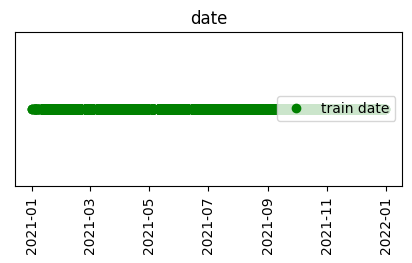

In [18]:
# распределение даты в признаке
plt.figure(figsize=(5, 2))
plt.plot(df_1['date'], np.ones(df_1.shape[0]), 'o', c='green', label='train date')
plt.title('date')
plt.yticks([])
plt.xticks(rotation=90)
plt.legend(loc='center right')
plt.show()

### сайт https://www.consultant.ru/legalnews/buh/ часть 2

файл `buh_2022_consultant.csv`

In [19]:
df_2 = csv_read_info('buh_2022_consultant.csv', PATH_DATA)

Первые 2 строки файла:


,date,main,text,href
0,31 января,"Минтруд утвердил формы, по которым нужно представлять сведения о ликвидации и другую информацию","\nПо утвержденным формам работодатели должны передавать в службу занятости в том числе данные:о банкротстве;введении режима неполного рабочего дня (недели) и приостановке производства;наличии квотируемых мест для инвалидов.Кроме того, больше информации понадобится представлять в случаях ликвидации и сокращений. В новой форме предусмотрели, например, что помимо количества увольняемых работодатели должны заполнять данные по каждому из них. Нужно указать Ф.И.О., должности, средний размер зарплаты и др. Ранее таких подробностей не требовали.Напомним, по общему правилу эти сведения работодатель может передать, например, на сайте ""Работа в России"" или непосредственно в службу занятости.",https://www.consultant.ru//legalnews/18344/
1,31 января,В Санкт-Петербурге с 2 февраля нельзя допускать детей во многие заведения общепита и магазины,"\nС 2 по 13 февраля в городе запретили допускать несовершеннолетних на объекты общепита. Исключения — столовые и буфеты образовательных организаций, предприятия на вокзалах, в аэропорту и т.д. (абз. 2 и 11 п. 1.12 постановления).Аналогичное правило ввели для объектов розничной торговли, кроме аптек, магазинов продуктов и непродовольственных товаров первой необходимости.Приняли и другие меры.Напомним, ранее в Санкт-Петербурге среди прочего запретили с 28 января по 13 февраля допускать несовершеннолетних в бассейны, фитнес-центры, музеи и в некоторые иные места. Подробнее в нашей новости.",https://www.consultant.ru//legalnews/18343/



Получим общую информацию о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2341 non-null   object
 1   main    2341 non-null   object
 2   text    2341 non-null   object
 3   href    2341 non-null   object
dtypes: object(4)
memory usage: 73.3+ KB


None


Пропущенные значения:


,количество пропущенных значений,процент пропущенных значений



Количество дубликатов: 0


In [20]:
%%time
# очистка и лемматизация заголовков статей
df_2['main_clean'] = df_2['main'].apply(text_clean_func)
df_2['main_lemm'] = df_2['main_clean'].apply(text_lemm_func)
df_2[['main', 'main_clean', 'main_lemm']].sample(5)

CPU times: user 2.57 s, sys: 6.83 ms, total: 2.57 s
Wall time: 2.57 s


,main,main_clean,main_lemm
1005,Подборка интересных судебных споров за I квартал 2022 года для бухгалтера бюджетной организации,подборка интересных судебных споров за i квартал года для бухгалтера бюджетной организации,подборка интересный судебный спор i квартал год бухгалтер бюджетный организация
2114,"Суд напомнил: госслужащего нельзя уволить за неоднократные проступки, если его за них уже наказали",суд напомнил госслужащего нельзя уволить за неоднократные проступки если его за них уже наказали,суд напомнить госслужащий уволить неоднократный проступок наказать
2033,Мобилизованные и их семьи смогут получить особые кредитные каникулы — проект прошел Госдуму,мобилизованные и их семьи смогут получить особые кредитные каникулы проект прошел госдуму,мобилизовать семья смочь получить особый кредитный каникулы проект пройти госдума
1816,Опубликовали список программ для обязательной предустановки на гаджеты с 2023 года,опубликовали список программ для обязательной предустановки на гаджеты с года,опубликовать список программа обязательный предустановка гаджет год
547,Розничная продажа алкоголя: получение и продление лицензий хотят временно упростить,розничная продажа алкоголя получение и продление лицензий хотят временно упростить,розничный продажа алкоголь получение продление лицензия хотеть временно упростить


#### признак дата

In [21]:
df_2['date'].apply(date_text_sep).unique()

array(['января', 'февраля', 'марта', 'апреля', 'мая', 'июня', 'июля',
       'августа', 'сентября', 'сегодня', 'октября'], dtype=object)

In [22]:
# удаление записей с текстом сегодня
df_2 = df_2[df_2['date'].str.lower().str.contains('сегодня') == False]

In [23]:
def month_to_value_func_ver2(text):
    """
    функция для замены текстового значения месяца на число + добавление текущего года
    
    """
    new_text = ''.join(dict_to_change[p] if p in dict_to_change else p for p in re.split(r'(\W+)', text))
    return new_text + ' 2022'

In [24]:
# замена текстового месяца на число и изменение типа данных на datetime
df_2['date'] = df_2['date'].apply(month_to_value_func_ver2)
df_2['date'] = pd.to_datetime(df_2['date'], format='%d %m %Y')

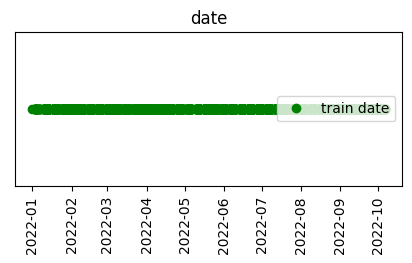

In [25]:
plt.figure(figsize=(5, 2))
plt.plot(pd.to_datetime(df_2['date']), np.ones(df_2.shape[0]), 'o', c='green', label='train date')
plt.title('date')
plt.yticks([])
plt.xticks(rotation=90)
plt.legend(loc='center right')
plt.show()

### сайт https://www.klerk.ru/buh/news/
файл buh_22_21_klerk.csv

In [26]:
df_3 = csv_read_info('buh_22_21_klerk.csv', PATH_DATA)

Первые 2 строки файла:


,date,tag,main,text,href
0,unknown-date,ЕГАИС,После смерти ИП сведения об обороте алкоголя в его бизнесе не фиксируют в ЕГАИС,"\n\r\tКак сообщает Росалкогольрегулирование в письме от 23.09.2022 № г-4192/02-06, сведения о снятии ИП с учета — это основание для приостановления фиксации сведений об обороте алкогольной продукции в ЕГАИС.\r\tТакая норма заложена в п. 44 правил ведения ЕГАИС, утвержденных постановлением Правительства от 31.12.2020 № 2466.\n\n\n",https://www.klerk.ru/buh/news/537149/
1,unknown-date,Санкции 2022,Компании адаптировались к санкциям. 60% уже нашло новых поставщиков,"\n\r\t59,3% российских компаний уже смогли найти новых поставщиков.\r\tПочти 70% из них закупаются у соотечественников, а 25% закупает сырье у поставщиков из дружественных стран, сообщают «vesti.ru».\r\tПосле объявления санкций большинство российских компаний были вынуждены искать новые каналы поставок сырья и материалов.\n\n\n",https://www.klerk.ru/buh/news/537059/



Получим общую информацию о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   tag     1000 non-null   object
 2   main    1000 non-null   object
 3   text    1000 non-null   object
 4   href    1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


None


Пропущенные значения:


,количество пропущенных значений,процент пропущенных значений



Количество дубликатов: 0


In [27]:
%%time
# очистка и лемматизация заголовков статей
df_3['main_clean'] = df_3['main'].apply(text_clean_func)
df_3['main_lemm'] = df_3['main_clean'].apply(text_lemm_func)
df_3[['main', 'main_clean', 'main_lemm']].sample(5)

CPU times: user 941 ms, sys: 4.22 ms, total: 945 ms
Wall time: 945 ms


,main,main_clean,main_lemm
164,"Налоговики грозят уголовкой тем, кто покупает валюту по объявлениям в соцсетях",налоговики грозят уголовкой тем кто покупает валюту по объявлениям в соцсетях,налоговик грозить уголовка покупать валюта объявление соцсеть
33,Средний чек туриста по карте «Мир» в Турции всего 4000 рублей,средний чек туриста по карте мир в турции всего рублей,средний чек турист карта мир турция рубль
351,❗ В перечень капвложений внесут расходы на нематериальные активы. Готовы поправки в ФСБУ 26/2020,в перечень капвложений внесут расходы на нематериальные активы готовы поправки в фсбу,перечень капвложение внести расход нематериальный актив готовый поправка фсб
560,Сотрудник на прошлом месте работы не выбрал трудовую книжку. Какую ему теперь вести?,сотрудник на прошлом месте работы не_выбрал трудовую книжку какую ему теперь вести,сотрудник прошлый место работа не_выбрать трудовой книжка какой вести
602,Путин поручил проработать вопрос индексации пенсий работающих пенсионеров,путин поручил проработать вопрос индексации пенсий работающих пенсионеров,путин поручить проработать вопрос индексация пенсия работать пенсионер


#### признак дата

In [28]:
# даты нет в данных, заполнение пропусками
df_3['date'] = np.nan
df_3['date'] = pd.to_datetime(df_3['date'])

### конкатенация данных для бухгалера и выгрузка

In [29]:
df_buh_concat = pd.concat([df_1, df_2, df_3])

In [30]:
df_buh_concat.columns

Index(['date', 'main', 'text', 'href', 'main_clean', 'main_lemm', 'tag'], dtype='object')

In [31]:
df_buh_concat.shape

(6307, 7)

In [32]:
df_buh_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6307 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        5307 non-null   datetime64[ns]
 1   main        6307 non-null   object        
 2   text        6307 non-null   object        
 3   href        6307 non-null   object        
 4   main_clean  6307 non-null   object        
 5   main_lemm   6307 non-null   object        
 6   tag         1000 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 394.2+ KB


In [33]:
# выгрузка очищенного датасета
(
    df_buh_concat
    .to_csv(PATH_CLEAN + "df_buh_concat.csv")
)

In [34]:
df_buh_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6307 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        5307 non-null   datetime64[ns]
 1   main        6307 non-null   object        
 2   text        6307 non-null   object        
 3   href        6307 non-null   object        
 4   main_clean  6307 non-null   object        
 5   main_lemm   6307 non-null   object        
 6   tag         1000 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 394.2+ KB


Посмотрим на облако слов заголовков:

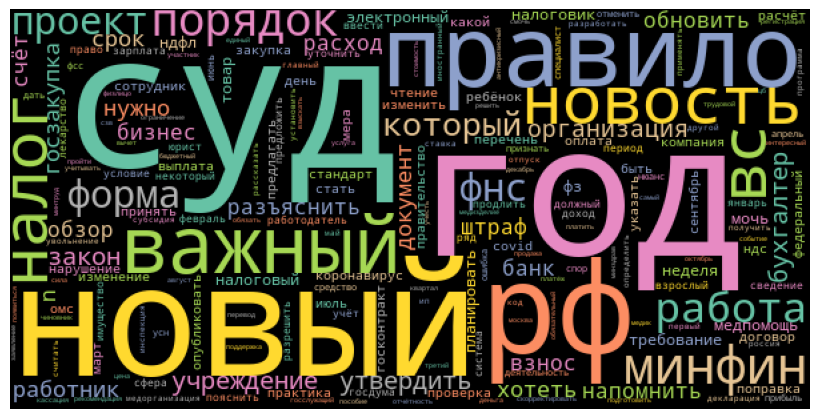

In [35]:
text_split = ' '.join(df_buh_concat['main_lemm'].tolist())
wordcloud_print(text_split)

## чтение спарсенных данных для роли ген директор

### сайт https://russian.rt.com/tag/biznes
файл bus_2122_rt.csv

In [36]:
df_22 = csv_read_info('bus_2122_rt.csv', PATH_DATA)

Первые 2 строки файла:


,Unnamed: 0,herf,tilte,text,date_1
0,0,https://russian.rt.com/opinion/1058357-malcev-rossiya-import-moldaviya-selskoe-hozyaistvo,С почином!,"Внимательно отношусь к развитию виноделия. Так вот, я тут стал замечать некоторые вина приличные из приличных сортов винограда: пино-нуар, шардоне, каберне-совиньон — и все они из Оргеевского района Молдавии. Проблема была только в том, что как класс сельхозпродукция из страны Молдавии у нас, мягко сказать, ограничена. То жучков там находили, то ещё чего. И как-то Молдавию у нас быстро импортозаместили, особенно по овощам и фруктам из 34 районов страны. Вино туда же. А жаль: мы так старательно приучали нашу публику к хорошему вину, что таки добились неплохих результатов.\nТакже по теме\nРоссельхознадзор заявил, что решение ограничить импорт товаров из Молдавии не политическое\nРешение Россельхознадзора ограничить ввоз растительной продукции из ряда районов Молдавии не является политическим. Об этом говорится...\nТем временем Орхей (именно так значится на картах центр района) проделал работу над ошибками, в отличие от соседей. А главное — понял, что Кишинёву с его политическими играми имени Санду на работяг и экономику вообще наплевать, он смотрит в рот фон дер Ляйен и не понимает: если сюда доберётся Еврокомиссия, то плакали местные производители, как это уже происходило везде, начиная с Португалии. И тогда парни взяли свою судьбу в свои же руки.\nТут глава местной оппозиции Илан Шор так и сказал: «Хватит терпеть унижения и плевки от власти. Вставайте, садитесь на тракторы и приезжайте к президентуре. Мы вместе добьёмся досрочных выборов и наконец-то освободим Молдавию от этих сумасшедших».\nОн напомнил, что Россия — стратегический партнёр Молдавии, и призвал фермеров страны добиваться отставки президента Майи Санду и дальше развивать экспорт сельхозпродукции страны.\nОтчего это такие резкие заявления? А кое-что изменилось в пользу прагматических соображений.\nА потому, что произошло событие, как написали бы блогеры, знаковое: среди всех этих ограничений вдруг Россия возобновила работу с производителями Оргеевского района. Их пока три: GT Petru Maler, SRL Laur Matei и SRL Rusmiliud. Как значится в профиле этих предприятий, «яблоко, слива, вишня» — то, что у нас называют «подкарантинные товары».\nКак уточняет Россельхознадзор, импорт с трёх молдавских предприятий в Оргеевском районе будет осуществляться в режиме усиленного лабораторного контроля.\nТакже по теме\nЕвросоюз увеличил экспортные квоты для молдавской сельхозпродукции\nГлава МИД Молдавии Нику Попеску заявил, что Европейский совет одобрил увеличение экспортных квот на некоторые виды молдавской...\nИ вот важное: «В дальнейшем ведомство рассмотрит возможность расширения списка сельхозпредприятий, если подтвердится фитосанитарная безопасность овощей и фруктов».\nВот как интересно тележка покатилась. Невзирая на игры политиканов.\nТак, глядишь, и до вина дойдём: там в районе есть свои шато (буквально Chateau) — типа как во Франции. И вообще, как сказал бы один выдающийся политический деятель России, «торговля лучше, чем неторговля». А то, что гигантский российский рынок привык получать полный ассортимент фруктов и овощей круглый год по нормальной цене, — это факт. Значит, мы готовы работать с каждым, кто выполняет резонные условия надзора. И мыслит как бизнес, а не как Санду.\nВсе эти Санду сегодня есть, а завтра нет, а синяя слива — вот она.\nНачальству бы кишинёвскому на таких работяг молиться надо: они не клянчат денег или газа — они везут деньги в свою страну. А вернее, в свой район, который и так весьма ухоженный и небедный.\nС почином!\nТочка зрения автора может не совпадать с позицией редакции.","7 октября 2022, 19:27"
1,1,https://russian.rt.com/business/news/1058250-habarovsk-belarus-biznes,В Хабаровске 13 октября пройдёт посвящённый вопросам сотрудничества с Белоруссией форум,"Об этом сообщает transsibinfo.com со ссылкой на Министерство экономического развития региона.\nОтмечается, что это будет ответный визит белорусских пар


Получим общую информацию о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  870 non-null    int64 
 1   herf        870 non-null    object
 2   tilte       870 non-null    object
 3   text        870 non-null    object
 4   date_1      870 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.1+ KB


None


Пропущенные значения:


,количество пропущенных значений,процент пропущенных значений



Количество дубликатов: 0


In [37]:
# колонки как в данных для бухгалтера
df_22.drop(columns=['Unnamed: 0'], inplace=True)
df_22.columns = ['href', 'main', 'text', 'date']

In [38]:
%%time
# очистка и лемматизация заголовков статей
df_22['main_clean'] = df_22['main'].apply(text_clean_func)
df_22['main_lemm'] = df_22['main_clean'].apply(text_lemm_func)
df_22[['main', 'main_clean', 'main_lemm']].head(5)

CPU times: user 831 ms, sys: 3.87 ms, total: 835 ms
Wall time: 834 ms


,main,main_clean,main_lemm
0,С почином!,с почином,почин
1,В Хабаровске 13 октября пройдёт посвящённый вопросам сотрудничества с Белоруссией форум,в хабаровске октября пройдет посвященный вопросам сотрудничества с белоруссией форум,хабаровск октябрь пройти посвятить вопрос сотрудничество белоруссия форум
2,"В Москве промпредприятия увеличили объём производства на 6,5% за восемь месяцев",в москве промпредприятия увеличили объем производства на за восемь месяцев,москва промпредприятие увеличить объём производство восемь месяц
3,«Ъ»: сеть магазинов OBI в России переименуют,ъ сеть магазинов obi в россии переименуют,ъ сеть магазин obi россия переименовать
4,Маск обвинил руководство Twitter в безрассудных действиях,маск обвинил руководство twitter в безрассудных действиях,маск обвинить руководство twitter безрассудный действие


#### признак дата

In [39]:
df_22['date'].apply(date_text_sep).unique()

array(['октября', 'сентября'], dtype=object)

In [40]:
# замена текстового месяца на число и изменение типа данных на datetime
df_22['date'] = df_22['date'].apply(month_to_value_func)
df_22['date'] = pd.to_datetime(df_22['date'], format='%d %m %Y, %H:%M')
df_22['date'] = pd.to_datetime(df_22['date'].dt.date)

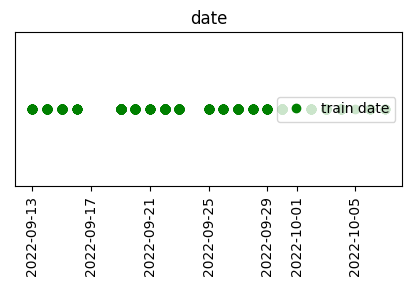

In [41]:
plt.figure(figsize=(5, 2))
plt.plot(pd.to_datetime(df_22['date']), np.ones(df_22.shape[0]), 'o', c='green', label='train date')
plt.title('date')
plt.yticks([])
plt.xticks(rotation=90)
plt.legend(loc='center right')
plt.show()

### конкатенация данных для директора и выгрузка

In [42]:
df_bus_concat = pd.concat([df_22])

In [43]:
df_bus_concat.shape

(870, 6)

In [44]:
df_bus_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   href        870 non-null    object        
 1   main        870 non-null    object        
 2   text        870 non-null    object        
 3   date        870 non-null    datetime64[ns]
 4   main_clean  870 non-null    object        
 5   main_lemm   870 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 40.9+ KB


In [45]:
# выгрузка очищенного датасета
(
    df_bus_concat
    .to_csv(PATH_CLEAN + "df_bus_concat.csv")
)

In [46]:
df_bus_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   href        870 non-null    object        
 1   main        870 non-null    object        
 2   text        870 non-null    object        
 3   date        870 non-null    datetime64[ns]
 4   main_clean  870 non-null    object        
 5   main_lemm   870 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 40.9+ KB
